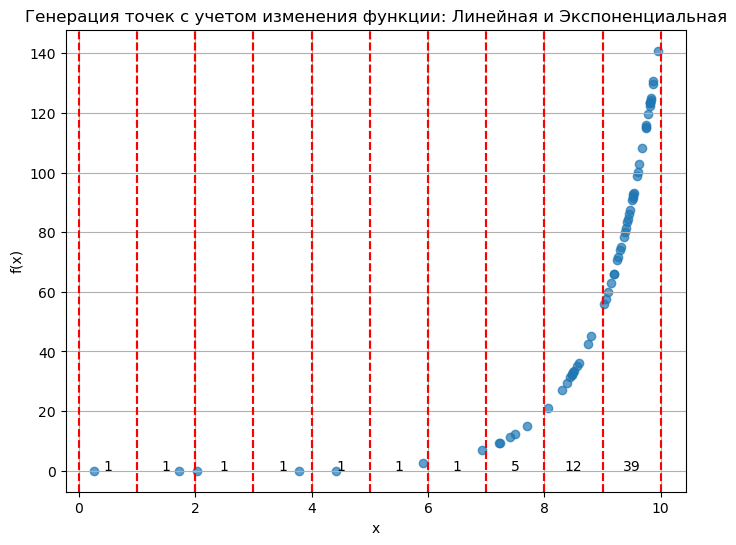

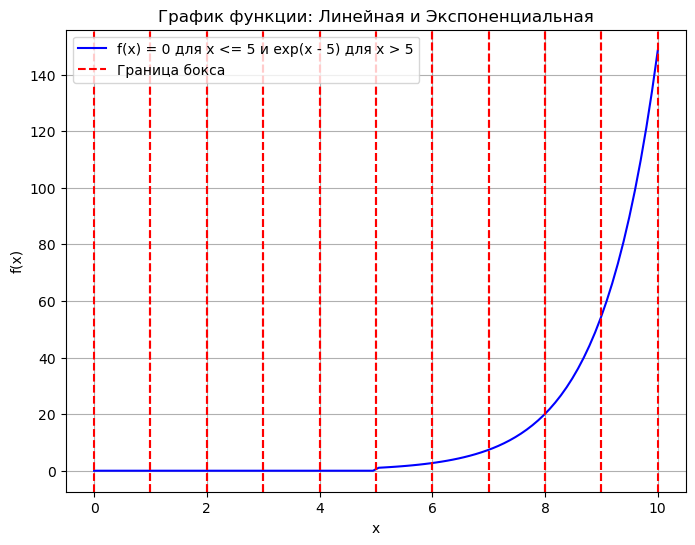

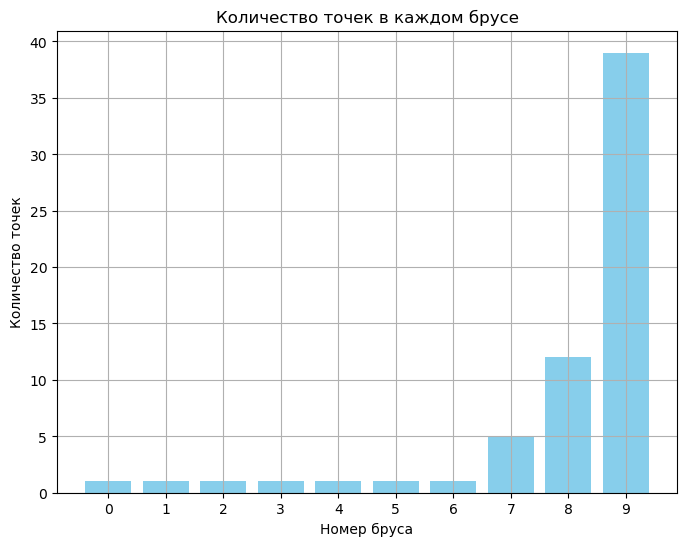

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def create_boxes(bounds, num_boxes):
    """
    Разбиение пространства на коробки по оси x.
    
    :param bounds: Ограничения на переменную x (min, max)
    :param num_boxes: Количество коробок для оси x
    :return: Список коробок для оси x
    """
    step = (bounds[1] - bounds[0]) / num_boxes
    boxes = [(bounds[0] + i*step, bounds[0] + (i+1)*step) for i in range(num_boxes)]
    return boxes


def compute_function_change(f, boxes):
    """
    Оценка изменения функции внутри каждой коробки, используя стандартное отклонение.
    
    :param f: Функция, для которой мы оцениваем изменение.
    :param boxes: Список коробок (интервалов) по оси x
    :return: Список изменения функции в каждой коробке
    """
    changes = []
    for box in boxes:
        # Генерация случайных точек в пределах коробки
        box_points = np.random.uniform(box[0], box[1], 100)  # 100 случайных точек
        values = f(box_points)
        change = np.std(values)  # Стандартное отклонение значений функции в коробке
        changes.append(change)
    
    return changes


def generate_adaptive_points(f, bounds, num_boxes, m):
    """
    Генерация точек с учетом изменения функции на коробках.
    
    :param f: Функция, для которой генерируем точки.
    :param bounds: Ограничения на переменную x (min, max)
    :param num_boxes: Количество коробок для оси x
    :param m: Общее количество точек для генерации
    :return: Список сгенерированных точек
    """
    # 1. Разделяем пространство на коробки
    boxes = create_boxes(bounds, num_boxes)
    
    # 2. Оцениваем изменение функции внутри каждой коробки
    changes = compute_function_change(f, boxes)
    
    # 3. Нормализуем изменения, чтобы сумма всех изменений была равна 1
    total_change = sum(changes)
    normalized_changes = [change / total_change for change in changes]
    
    # 4. Генерация точек с учетом изменений
    points = []
    points_per_box = []
    for i, normalized_change in enumerate(normalized_changes):
        # Минимум 1 точка в каждом боксе
        num_points_in_box = max(1, int(m * normalized_change))
        box = boxes[i]
        box_points = np.random.uniform(box[0], box[1], num_points_in_box)
        points.append(box_points)
        points_per_box.append(num_points_in_box)
    
    # Собираем все точки
    all_points = np.concatenate(points)
    
    return all_points, boxes, points_per_box


# Пример функции f, которая линейная на участке [0, 5] и экспоненциальная на [5, 10]
def f_linear_and_exponential(x):
    # Линейная на [0, 5], экспоненциальная на [5, 10]
    return np.where(x <= 5, 0, np.exp(x - 5))

# Ограничения на переменную x
bounds = (0, 10)  # x: [0..10]

# Параметры
num_boxes = 10  # Количество коробок по оси x
m = 60  # Общее количество точек для генерации

# Генерация точек с учетом изменения функции
points, boxes, points_per_box = generate_adaptive_points(f_linear_and_exponential, bounds, num_boxes, m)

# Визуализация сгенерированных точек
plt.figure(figsize=(8, 6))
plt.scatter(points, f_linear_and_exponential(points), alpha=0.7)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Генерация точек с учетом изменения функции: Линейная и Экспоненциальная')

# Добавление границ боксов
for i, box in enumerate(boxes):
    plt.axvline(x=box[0], color='red', linestyle='--', label='Граница бокса' if i == 0 else "")
    plt.axvline(x=box[1], color='red', linestyle='--')
    
    # Добавляем количество точек в каждом боксе
    plt.text(np.mean(box), 0.1, f'{points_per_box[i]}', ha='center', color='black')

plt.grid(True)
plt.show()

# Визуализация изменения функции по оси x
x_values = np.linspace(bounds[0], bounds[1], 100)
y_values = f_linear_and_exponential(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label="f(x) = 0 для x <= 5 и exp(x - 5) для x > 5", color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции: Линейная и Экспоненциальная')

# Добавление границ боксов
for i, box in enumerate(boxes):
    plt.axvline(x=box[0], color='red', linestyle='--', label='Граница бокса' if i == 0 else "")
    plt.axvline(x=box[1], color='red', linestyle='--')

plt.grid(True)
plt.legend()
plt.show()

# График количества точек в каждом боксе
plt.figure(figsize=(8, 6))
plt.bar(range(len(points_per_box)), points_per_box, color='skyblue')
plt.xlabel('Номер бруса')
plt.ylabel('Количество точек')
plt.title('Количество точек в каждом брусе')
plt.xticks(range(len(points_per_box)))
plt.grid(True)
plt.show()


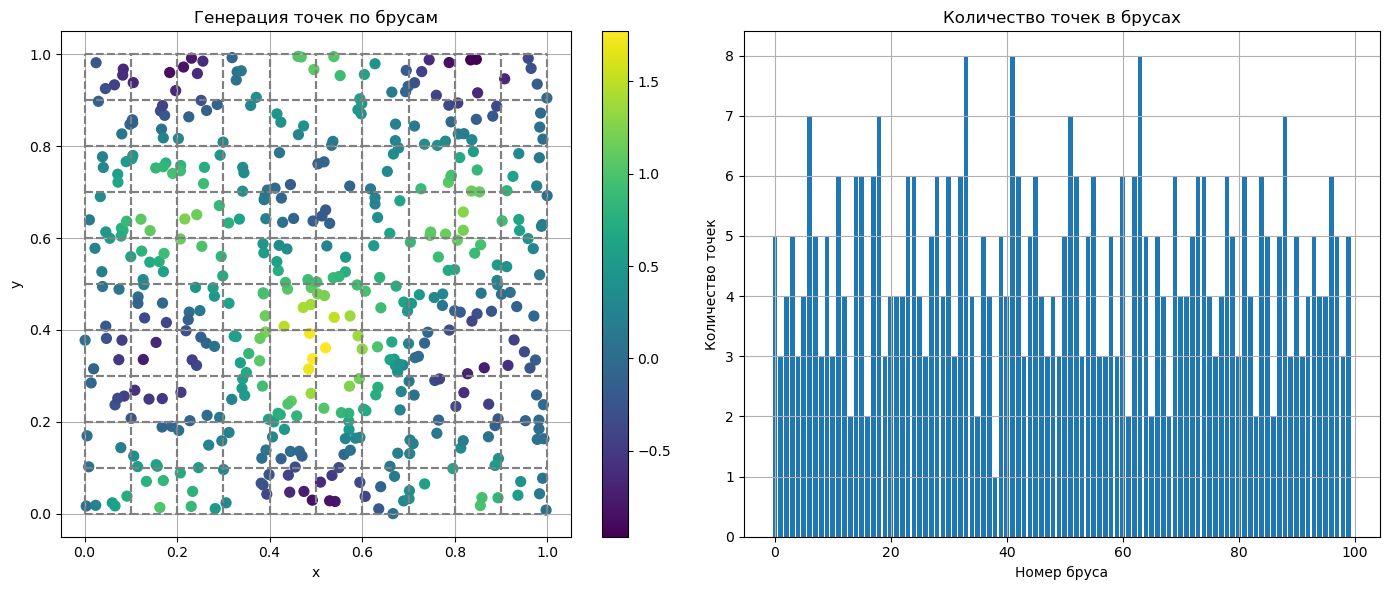

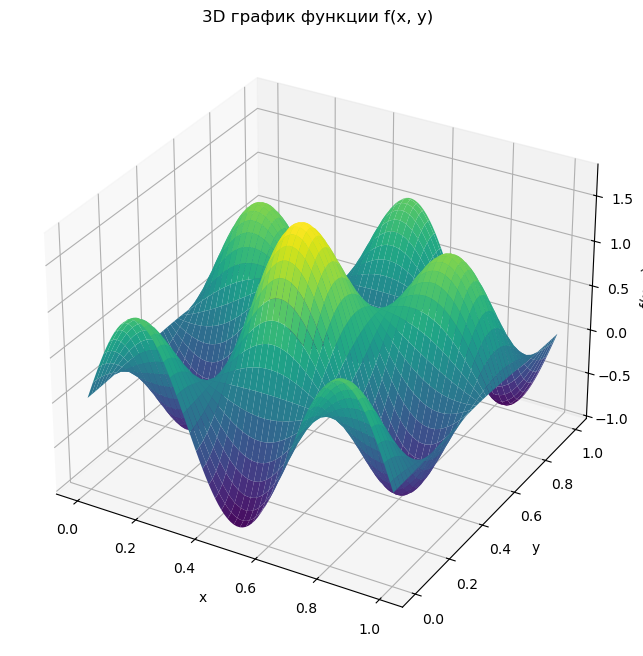

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Гладкая функция без ступенек
def f(x, y):
    # Модификация функции: начальная часть плоская, затем парабола или экспонента
    result = np.zeros_like(x)
    smooth_transition = np.tanh(20 * (x - 0.5))  # Плавный переход от плоской области к параболе
    for i in range(len(x)):
        if smooth_transition[i] < 0:
            result[i] = 0  # Плоская область
        else:
            result[i] = smooth_transition[i] * (x[i] ** 2 + y[i] ** 2)  # Параболический рост
    return result

# Функция с локальными минимумами и максимумами
def f(x, y):
    term1 = np.sin(3 * np.pi * x) * np.cos(3 * np.pi * y)
    term2 = np.exp(-((x - 0.5) ** 2 + (y - 0.5) ** 2) / 0.1)  # Гауссовая функция
    return term1 + term2

# Создание коробок
def create_boxes(bounds, num_boxes):
    """
    Функция для создания коробок в двумерном пространстве
    :param bounds: пределы по осям x и y [(xmin, xmax), (ymin, ymax)]
    :param num_boxes: количество коробок по каждой оси
    :return: список коробок
    """
    x_min, x_max = bounds[0]
    y_min, y_max = bounds[1]
    x_step = (x_max - x_min) / num_boxes
    y_step = (y_max - y_min) / num_boxes
    x_edges = np.linspace(x_min, x_max, num_boxes + 1)
    y_edges = np.linspace(y_min, y_max, num_boxes + 1)

    boxes = []
    for i in range(num_boxes):
        for j in range(num_boxes):
            boxes.append(((x_edges[i], x_edges[i+1]), (y_edges[j], y_edges[j+1])))
    
    return boxes

# Генерация точек для функции f(x, y) с пропорциональным распределением
def generate_points(boxes, m_total, f):
    """
    Генерация точек для функции f(x, y) с пропорциональным распределением
    :param boxes: коробки
    :param m_total: общее количество точек
    :param f: функция
    :return: точки и их значения
    """
    num_boxes = len(boxes)
    volumes = []
    changes = []
    
    # Оценка изменений функции в каждой коробке
    for box in boxes:
        (x_min, x_max), (y_min, y_max) = box
        points_x = np.random.uniform(x_min, x_max, 100)  # Генерация 100 случайных точек для оценки
        points_y = np.random.uniform(y_min, y_max, 100)
        
        values = f(points_x, points_y)
        change = np.std(values)  # Стандартное отклонение в этой коробке
        changes.append(change)
        volumes.append((x_max - x_min) * (y_max - y_min))  # Площадь коробки

    # Нормализация изменений
    total_change = np.sum(changes)
    normalized_changes = [change / total_change for change in changes]
    
    # Генерация точек пропорционально изменениям
    all_points = []
    all_values = []
    
    for i, box in enumerate(boxes):
        (x_min, x_max), (y_min, y_max) = box
        num_points_in_box = max(1, int(m_total * normalized_changes[i]))  # Гарантируем хотя бы 1 точку
        
        points_x = np.random.uniform(x_min, x_max, num_points_in_box)
        points_y = np.random.uniform(y_min, y_max, num_points_in_box)
        
        values = f(points_x, points_y)
        
        all_points.append(np.column_stack((points_x, points_y)))
        all_values.append(values)
    
    return np.vstack(all_points), np.concatenate(all_values), changes  # Возвращаем changes

# Установки
bounds = [(0, 1), (0, 1)]  # Ограничения для x и y
num_boxes = 10  # Число коробок по обеим осям
m_total = 500  # Общее количество точек

# Создание коробок
boxes = create_boxes(bounds, num_boxes)

# Генерация точек
points, values, changes = generate_points(boxes, m_total, f)

# Визуализация
fig = plt.figure(figsize=(14, 6))

# Первый график: Диаграмма с точками и разлиновкой
ax1 = fig.add_subplot(121)
scatter = ax1.scatter(points[:, 0], points[:, 1], c=values, cmap='viridis', marker='o', s=50)
ax1.set_title("Генерация точек по брусам")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.grid(True)
fig.colorbar(scatter, ax=ax1)

# Добавление разлиновки для коробок
for box in boxes:
    (x_min, x_max), (y_min, y_max) = box
    ax1.plot([x_min, x_min], [y_min, y_max], color="gray", linestyle="--")
    ax1.plot([x_max, x_max], [y_min, y_max], color="gray", linestyle="--")
    ax1.plot([x_min, x_max], [y_min, y_min], color="gray", linestyle="--")
    ax1.plot([x_min, x_max], [y_max, y_max], color="gray", linestyle="--")

# Второй график: Количество точек в коробках
ax2 = fig.add_subplot(122)
num_points_in_boxes = [max(1, int(m_total * change / np.sum(changes))) for change in changes]
ax2.bar(range(len(boxes)), num_points_in_boxes)
ax2.set_title("Количество точек в брусах")
ax2.set_xlabel("Номер бруса")
ax2.set_ylabel("Количество точек")
ax2.grid(True)

plt.tight_layout()
plt.show()

# 3D график функции f(x, y)
X = np.linspace(0, 1, 100)
Y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(X, Y)
Z = f(X.flatten(), Y.flatten()).reshape(X.shape)

fig = plt.figure(figsize=(12, 8))
ax3d = fig.add_subplot(111, projection='3d')

# Построение поверхности
ax3d.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

ax3d.set_title("3D график функции f(x, y)")
ax3d.set_xlabel("x")
ax3d.set_ylabel("y")
ax3d.set_zlabel("f(x, y)")
plt.show()


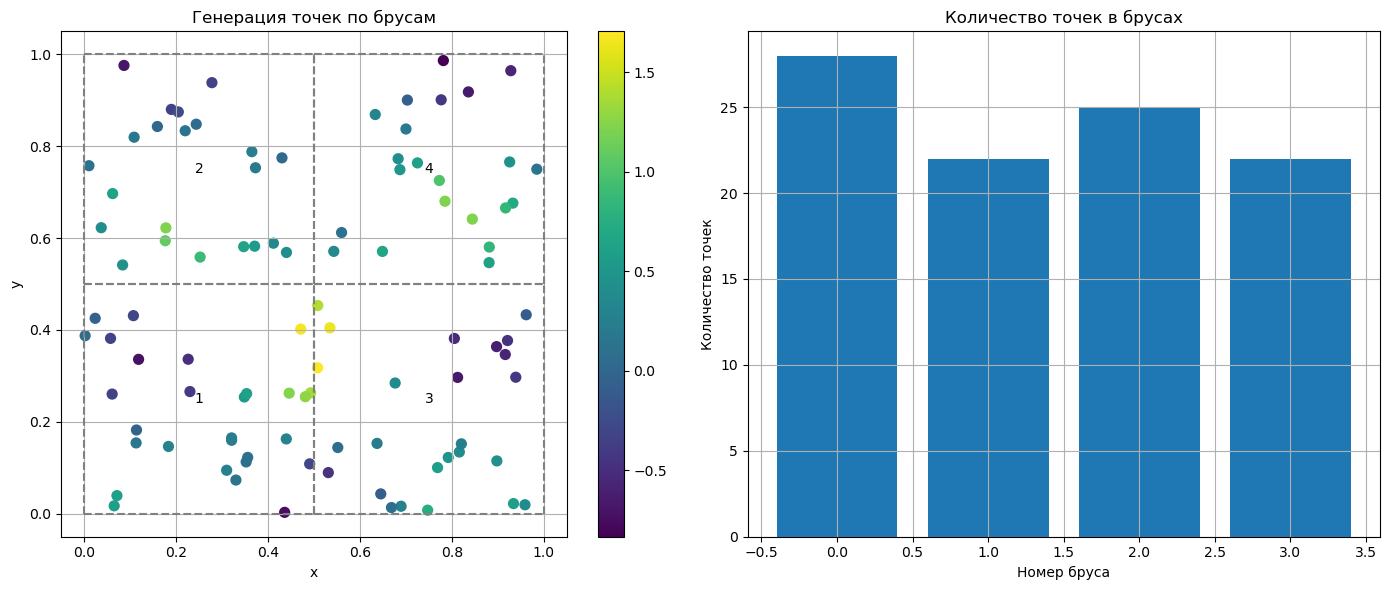

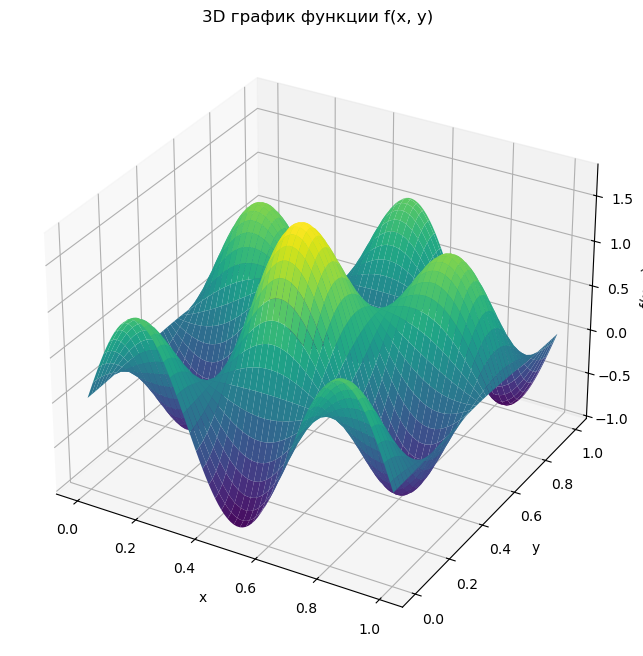

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Функция с локальными минимумами и максимумами
def f(x, y):
    term1 = np.sin(3 * np.pi * x) * np.cos(3 * np.pi * y)
    term2 = np.exp(-((x - 0.5) ** 2 + (y - 0.5) ** 2) / 0.1)  # Гауссовая функция
    return term1 + term2

# Создание коробок
def create_boxes(bounds, num_boxes):
    """
    Функция для создания коробок в двумерном пространстве
    :param bounds: пределы по осям x и y [(xmin, xmax), (ymin, ymax)]
    :param num_boxes: количество коробок по каждой оси
    :return: список коробок
    """
    x_min, x_max = bounds[0]
    y_min, y_max = bounds[1]
    x_step = (x_max - x_min) / num_boxes
    y_step = (y_max - y_min) / num_boxes
    x_edges = np.linspace(x_min, x_max, num_boxes + 1)
    y_edges = np.linspace(y_min, y_max, num_boxes + 1)

    boxes = []
    for i in range(num_boxes):
        for j in range(num_boxes):
            boxes.append(((x_edges[i], x_edges[i+1]), (y_edges[j], y_edges[j+1])))
    
    return boxes

# Генерация точек для функции f(x, y) с пропорциональным распределением
def generate_points(boxes, m_total, f):
    """
    Генерация точек для функции f(x, y) с пропорциональным распределением
    :param boxes: коробки
    :param m_total: общее количество точек
    :param f: функция
    :return: точки и их значения
    """
    num_boxes = len(boxes)
    volumes = []
    changes = []
    
    # Оценка изменений функции в каждой коробке
    for box in boxes:
        (x_min, x_max), (y_min, y_max) = box
        points_x = np.random.uniform(x_min, x_max, 100)  # Генерация 100 случайных точек для оценки
        points_y = np.random.uniform(y_min, y_max, 100)
        
        values = f(points_x, points_y)
        change = np.std(values)  # Стандартное отклонение в этой коробке
        changes.append(change)
        volumes.append((x_max - x_min) * (y_max - y_min))  # Площадь коробки

    # Нормализация изменений
    total_change = np.sum(changes)
    normalized_changes = [change / total_change for change in changes]
    
    # Генерация точек пропорционально изменениям
    all_points = []
    all_values = []
    
    for i, box in enumerate(boxes):
        (x_min, x_max), (y_min, y_max) = box
        num_points_in_box = max(1, int(m_total * normalized_changes[i]))  # Гарантируем хотя бы 1 точку
        
        points_x = np.random.uniform(x_min, x_max, num_points_in_box)
        points_y = np.random.uniform(y_min, y_max, num_points_in_box)
        
        values = f(points_x, points_y)
        
        all_points.append(np.column_stack((points_x, points_y)))
        all_values.append(values)
    
    return np.vstack(all_points), np.concatenate(all_values), changes  # Возвращаем changes

# Установки
bounds = [(0, 1), (0, 1)]  # Ограничения для x и y
num_boxes = 2  # Число коробок по обеим осям
m_total = 100  # Общее количество точек

# Создание коробок
boxes = create_boxes(bounds, num_boxes)

# Генерация точек
points, values, changes = generate_points(boxes, m_total, f)

# Визуализация
fig = plt.figure(figsize=(14, 6))

# Первый график: Диаграмма с точками и разлиновкой
ax1 = fig.add_subplot(121)
scatter = ax1.scatter(points[:, 0], points[:, 1], c=values, cmap='viridis', marker='o', s=50)
ax1.set_title("Генерация точек по брусам")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.grid(True)
fig.colorbar(scatter, ax=ax1)

# Добавление разлиновки для коробок
for i, box in enumerate(boxes):
    (x_min, x_max), (y_min, y_max) = box
    ax1.plot([x_min, x_min], [y_min, y_max], color="gray", linestyle="--")
    ax1.plot([x_max, x_max], [y_min, y_max], color="gray", linestyle="--")
    ax1.plot([x_min, x_max], [y_min, y_min], color="gray", linestyle="--")
    ax1.plot([x_min, x_max], [y_max, y_max], color="gray", linestyle="--")

    # Центр бокса
    center_x = (x_min + x_max) / 2
    center_y = (y_min + y_max) / 2

    # Добавление текста с номером коробки в центр
    ax1.text(center_x, center_y, str(i + 1), color='black', ha='center', va='center', fontsize=10)

# Второй график: Количество точек в коробках
ax2 = fig.add_subplot(122)
num_points_in_boxes = [max(1, int(m_total * change / np.sum(changes))) for change in changes]
ax2.bar(range(len(boxes)), num_points_in_boxes)
ax2.set_title("Количество точек в брусах")
ax2.set_xlabel("Номер бруса")
ax2.set_ylabel("Количество точек")
ax2.grid(True)

plt.tight_layout()
plt.show()

# 3D график функции f(x, y)
X = np.linspace(0, 1, 100)
Y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(X, Y)
Z = f(X.flatten(), Y.flatten()).reshape(X.shape)

fig = plt.figure(figsize=(12, 8))
ax3d = fig.add_subplot(111, projection='3d')

# Построение поверхности
ax3d.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

ax3d.set_title("3D график функции f(x, y)")
ax3d.set_xlabel("x")
ax3d.set_ylabel("y")
ax3d.set_zlabel("f(x, y)")
plt.show()

### подбор коэффициентов функции

Результаты экспериментов при различном количестве брусов (num_boxes):
   num_boxes           MSE           MAE   R2
0          1  2.024466e-13  4.198423e-07  1.0
1          2  1.937038e-13  4.097887e-07  1.0
2          4  1.979325e-13  4.150188e-07  1.0
3          8  1.975617e-13  4.146613e-07  1.0
4         16  1.966903e-13  4.136712e-07  1.0


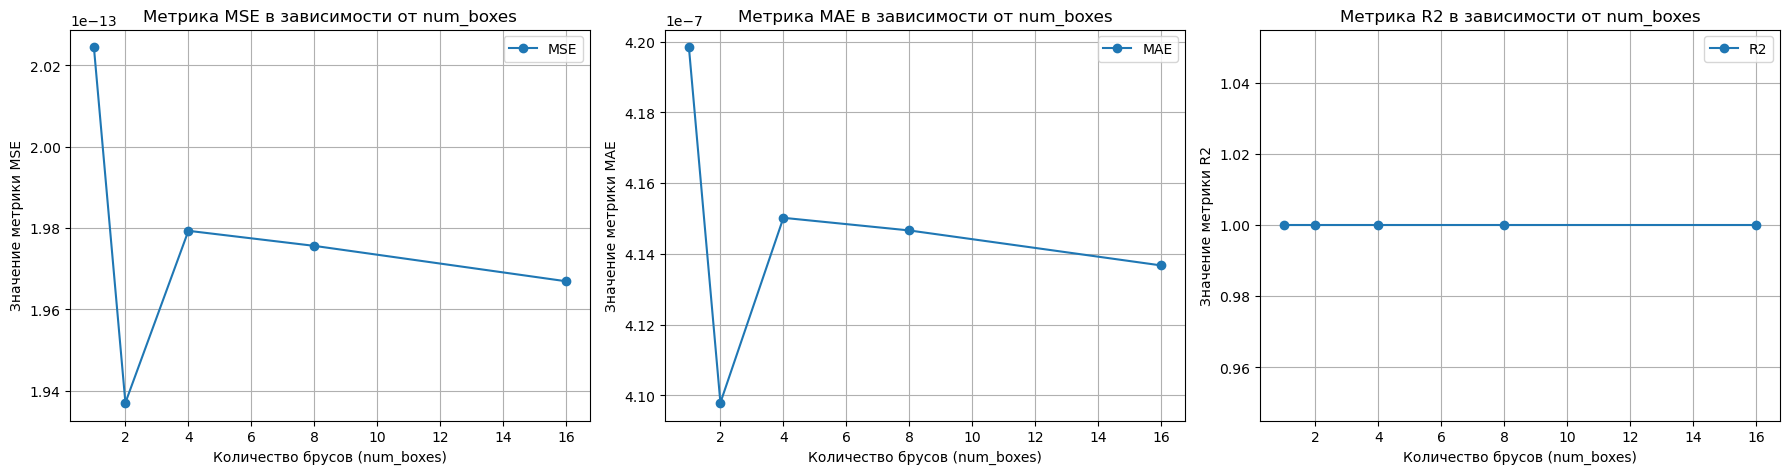

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd  # Для создания таблицы результатов

class LeastSquaresFitter:
    def __init__(self, func):
        """
        Инициализация класса.

        Parameters:
        func: callable
            Функция g, принимающая параметры a и массив x.
        """
        self.func = func
        self.coefficients = None

    def create_boxes(self, bounds, num_boxes):
        """
        Функция для создания коробок в n-мерном пространстве.

        Parameters:
        bounds: list of tuples
            Пределы по каждой оси [(xmin, xmax), (ymin, ymax), ...].
        num_boxes: int
            Количество коробок по каждой оси.

        Returns:
        boxes: list
            Список коробок.
        """
        dimensions = len(bounds)
        edges = []
        for dim in range(dimensions):
            min_val, max_val = bounds[dim]
            edges.append(np.linspace(min_val, max_val, num_boxes + 1))

        # Создаем сетку индексов для всех комбинаций коробок
        indices = np.indices([num_boxes]*dimensions).reshape(dimensions, -1).T

        boxes = []
        for index in indices:
            box = []
            for dim, idx in enumerate(index):
                box.append((edges[dim][idx], edges[dim][idx+1]))
            boxes.append(box)
        return boxes

    def generate_points(self, f, bounds, num_boxes, m_total, a_true, method='adaptive'):
        """
        Генерация точек для функции f(x) с выбранным методом.

        Parameters:
        f: callable
            Функция для генерации значений y.
        bounds: list of tuples
            Пределы по каждой оси [(xmin, xmax), (ymin, ymax), ...].
        num_boxes: int
            Количество коробок по каждой оси (только для адаптивного метода).
        m_total: int
            Общее количество точек.
        a_true: np.array
            Истинные коэффициенты.
        method: str
            Метод генерации точек ('random' или 'adaptive').

        Returns:
        points: np.array
            Сгенерированные факторы (входные данные x).
        values: np.array
            Значения функции на этих точках (целевые значения y).
        """
        if method == 'adaptive':
            # Используем адаптивный алгоритм
            boxes = self.create_boxes(bounds, num_boxes)
            num_boxes_total = len(boxes)
            changes = []

            # Оценка изменений функции в каждой коробке
            for box in boxes:
                samples_per_box = 100
                points_in_box = []
                for (min_val, max_val) in box:
                    points_in_box.append(np.random.uniform(min_val, max_val, samples_per_box))
                points_in_box = np.column_stack(points_in_box)
                values = f(points_in_box, a_true)
                change = np.std(values)  # Стандартное отклонение в этой коробке
                changes.append(change)

            # Нормализация изменений
            total_change = np.sum(changes)
            normalized_changes = [change / total_change for change in changes]

            # Генерация точек пропорционально изменениям
            all_points = []
            all_values = []

            for i, box in enumerate(boxes):
                num_points_in_box = max(1, int(m_total * normalized_changes[i]))  # Гарантируем хотя бы 1 точку
                points_in_box = []
                for (min_val, max_val) in box:
                    points_in_box.append(np.random.uniform(min_val, max_val, num_points_in_box))
                points_in_box = np.column_stack(points_in_box)
                values = f(points_in_box, a_true)
                all_points.append(points_in_box)
                all_values.append(values)

            return np.vstack(all_points), np.concatenate(all_values)

        elif method == 'random':
            # Полностью случайная генерация точек
            dimensions = len(bounds)
            points = []
            for (min_val, max_val) in bounds:
                points.append(np.random.uniform(min_val, max_val, m_total))
            points = np.column_stack(points)
            values = f(points, a_true)
            return points, values

        else:
            raise ValueError(f"Неизвестный метод генерации точек: {method}")

    def loss_function(self, a, x, y):
        """
        Функция потерь (метод наименьших квадратов).

        Parameters:
        a: np.array
            Текущие коэффициенты.
        x: np.array
            Входные данные.
        y: np.array
            Целевые значения.

        Returns:
        float
            Значение функции потерь.
        """
        predictions = self.func(a, x)
        return np.sum((predictions - y) ** 2)

    def fit(self, x, y):
        """
        Подбор коэффициентов методом наименьших квадратов.

        Parameters:
        x: np.array
            Входные данные.
        y: np.array
            Целевые значения.
        """
        initial_guess = np.zeros(x.shape[1])
        result = minimize(self.loss_function, initial_guess, args=(x, y))
        self.coefficients = result.x
        return self.coefficients

    def evaluate(self, x, y, criterion='MSE'):
        """
        Оценка точности модели по заданному критерию.

        Parameters:
        x: np.array
            Входные данные.
        y: np.array
            Целевые значения.
        criterion: str
            Критерий оценки ('MSE', 'MAE', 'R2').

        Returns:
        float
            Значение выбранной метрики.
        """
        if self.coefficients is None:
            raise ValueError("Модель не обучена. Сначала вызовите метод fit.")

        predictions = self.func(self.coefficients, x)

        if criterion == 'MSE':
            metric_value = mean_squared_error(y, predictions)
        elif criterion == 'MAE':
            metric_value = mean_absolute_error(y, predictions)
        elif criterion == 'R2':
            metric_value = r2_score(y, predictions)
        else:
            raise ValueError(f"Неизвестный критерий оценки: {criterion}")

        return metric_value

    def predict(self, x):
        """
        Предсказание значений y по входным данным x.

        Parameters:
        x: np.array
            Входные данные.

        Returns:
        np.array
            Предсказанные значения y.
        """
        if self.coefficients is None:
            raise ValueError("Модель не обучена. Сначала вызовите метод fit.")

        return self.func(self.coefficients, x)

# Пример использования
if __name__ == "__main__":
    # Импортируем библиотеку pandas для создания таблицы
    import pandas as pd

    # Определяем функцию g, которую будем подбирать
    def g(a, x):
        return np.dot(x, a) + np.sum(x ** 2, axis=1)

    # Определяем функцию f, на основе которой будем генерировать данные
    def f(x, a_true):
        # Функция, использующая истинные коэффициенты и добавляющая нелинейность
        return np.dot(x, a_true) + np.sum(x ** 2, axis=1)

    # Задаем истинные коэффициенты
    true_coefficients = np.array([2.5, -1.2])

    # Создаем экземпляр класса
    fitter = LeastSquaresFitter(func=g)

    # Задаем параметры
    bounds = [(0, 100), (0, 100)]  # Ограничения для каждой переменной
    m_total_train = 1000  # Общее количество обучающих точек
    m_total_test = 50    # Общее количество тестовых точек

    # Генерируем тестовый набор данных (используем случайный метод)
    x_test, y_test = fitter.generate_points(
        f, bounds, num_boxes=None, m_total=m_total_test, a_true=true_coefficients, method='random'
    )

    # Список значений num_boxes для экспериментов
    num_boxes_list = [1, 2, 4, 8, 16]

    # Список для хранения результатов
    results = []

    for num_boxes in num_boxes_list:
        # Генерируем обучающий набор данных с текущим num_boxes
        x_train, y_train = fitter.generate_points(
            f, bounds, num_boxes, m_total_train, a_true=true_coefficients, method='adaptive'
        )

        # Обучаем модель
        fitter.fit(x_train, y_train)

        # Оцениваем модель на тестовом наборе данных для всех метрик
        metrics = {}
        for criterion in ['MSE', 'MAE', 'R2']:
            metric_value = fitter.evaluate(x_test, y_test, criterion=criterion)
            metrics[criterion] = metric_value

        # Сохраняем результаты
        results.append({
            'num_boxes': num_boxes,
            'MSE': metrics['MSE'],
            'MAE': metrics['MAE'],
            'R2': metrics['R2']
        })

    # Создаем таблицу результатов
    results_df = pd.DataFrame(results)

    # Выводим таблицу
    print("Результаты экспериментов при различном количестве брусов (num_boxes):")
    print(results_df)

    # Визуализация метрик в зависимости от num_boxes на одном графике с помощью subplots
    metrics = ['MSE', 'MAE', 'R2']
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    for idx, metric in enumerate(metrics):
        axs[idx].plot(results_df['num_boxes'], results_df[metric], marker='o', label=metric)
        axs[idx].set_xlabel('Количество брусов (num_boxes)')
        axs[idx].set_ylabel(f'Значение метрики {metric}')
        axs[idx].set_title(f'Метрика {metric} в зависимости от num_boxes')
        axs[idx].grid(True)
        axs[idx].legend()

    plt.tight_layout()
    plt.show()

Результаты экспериментов при различном количестве коробок (num_boxes):
   num_boxes        MSE       MAE        R2
0          1  21.048727  1.632427 -0.084572
1          2  22.334887  2.173589 -0.150844
2          4  53.532940  5.431158 -1.758378
3          8  48.918177  5.111236 -1.520594
4         16  41.758868  4.572698 -1.151698
5         32  22.083115  2.123524 -0.137871
6         64  21.056411  1.690684 -0.084968
7        128  21.048245  1.631812 -0.084547


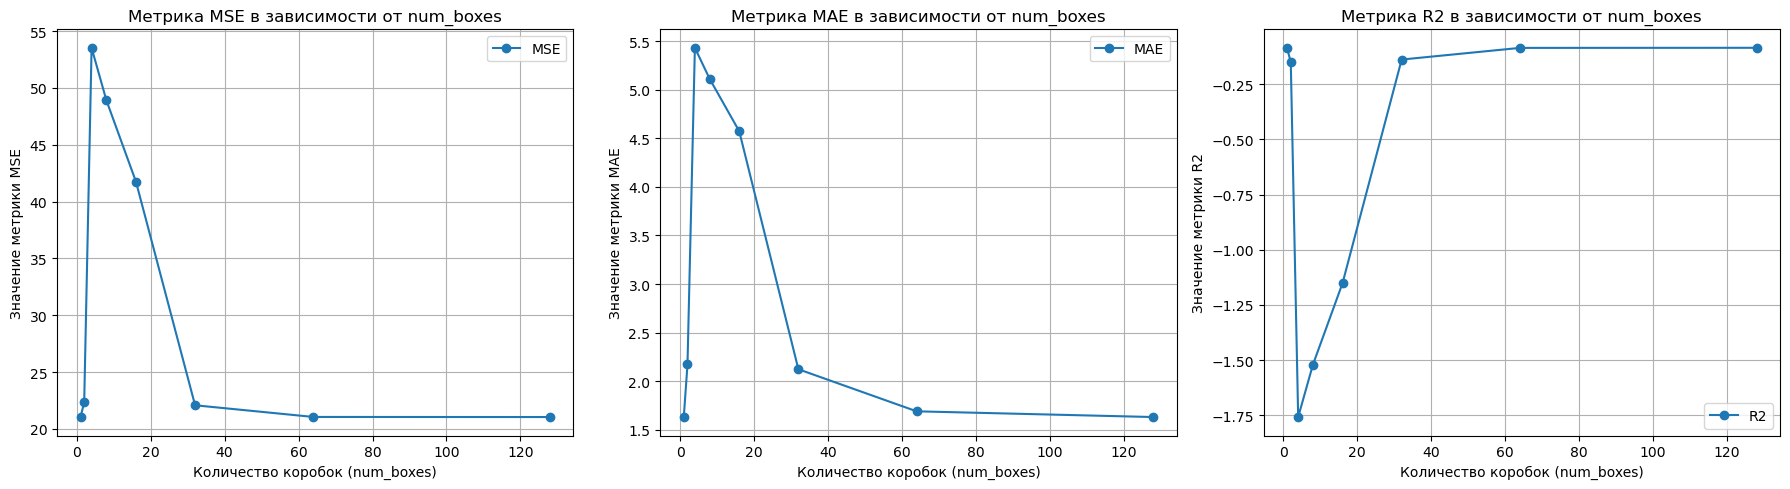

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd  # Для создания таблицы результатов

class LeastSquaresFitter:
    def __init__(self, func):
        """
        Инициализация класса.

        Parameters:
        func: callable
            Функция g, принимающая параметры a и массив x.
        """
        self.func = func
        self.coefficients = None

    def create_boxes(self, bounds, num_boxes):
        """
        Функция для создания коробок в n-мерном пространстве.

        Parameters:
        bounds: list of tuples
            Пределы по каждой оси [(xmin, xmax), (ymin, ymax), ...].
        num_boxes: int
            Количество коробок по каждой оси.

        Returns:
        boxes: list
            Список коробок.
        """
        dimensions = len(bounds)
        edges = []
        for dim in range(dimensions):
            min_val, max_val = bounds[dim]
            edges.append(np.linspace(min_val, max_val, num_boxes + 1))

        # Создаем сетку индексов для всех комбинаций коробок
        indices = np.indices([num_boxes]*dimensions).reshape(dimensions, -1).T

        boxes = []
        for index in indices:
            box = []
            for dim, idx in enumerate(index):
                box.append((edges[dim][idx], edges[dim][idx+1]))
            boxes.append(box)
        return boxes

    def generate_points(self, f, bounds, num_boxes, m_total, a_true, method='adaptive'):
        """
        Генерация точек для функции f(x) с выбранным методом.

        Parameters:
        f: callable
            Функция для генерации значений y.
        bounds: list of tuples
            Пределы по каждой оси [(xmin, xmax), (ymin, xmax), ...].
        num_boxes: int
            Количество коробок по каждой оси (только для адаптивного метода).
        m_total: int
            Общее количество точек.
        a_true: np.array
            Истинные коэффициенты.
        method: str
            Метод генерации точек ('random' или 'adaptive').

        Returns:
        points: np.array
            Сгенерированные факторы (входные данные x).
        values: np.array
            Значения функции на этих точках (целевые значения y).
        """
        if method == 'adaptive':
            # Используем адаптивный алгоритм
            boxes = self.create_boxes(bounds, num_boxes)
            num_boxes_total = len(boxes)
            changes = []

            # Оценка изменений функции в каждой коробке
            for box in boxes:
                samples_per_box = 100
                points_in_box = []
                for (min_val, max_val) in box:
                    points_in_box.append(np.random.uniform(min_val, max_val, samples_per_box))
                points_in_box = np.column_stack(points_in_box)
                values = f(points_in_box, a_true)
                change = np.std(values)  # Стандартное отклонение в этой коробке
                changes.append(change)

            # Нормализация изменений
            total_change = np.sum(changes)
            normalized_changes = [change / total_change for change in changes]

            # Генерация точек пропорционально изменениям
            all_points = []
            all_values = []

            for i, box in enumerate(boxes):
                num_points_in_box = max(1, int(m_total * normalized_changes[i]))  # Гарантируем хотя бы 1 точку
                points_in_box = []
                for (min_val, max_val) in box:
                    points_in_box.append(np.random.uniform(min_val, max_val, num_points_in_box))
                points_in_box = np.column_stack(points_in_box)
                values = f(points_in_box, a_true)
                all_points.append(points_in_box)
                all_values.append(values)

            return np.vstack(all_points), np.concatenate(all_values)

        elif method == 'random':
            # Полностью случайная генерация точек
            dimensions = len(bounds)
            points = []
            for (min_val, max_val) in bounds:
                points.append(np.random.uniform(min_val, max_val, m_total))
            points = np.column_stack(points)
            values = f(points, a_true)
            return points, values

        else:
            raise ValueError(f"Неизвестный метод генерации точек: {method}")

    def loss_function(self, a, x, y):
        """
        Функция потерь (метод наименьших квадратов).

        Parameters:
        a: np.array
            Текущие коэффициенты.
        x: np.array
            Входные данные.
        y: np.array
            Целевые значения.

        Returns:
        float
            Значение функции потерь.
        """
        predictions = self.func(a, x)
        return np.sum((predictions - y) ** 2)

    def fit(self, x, y):
        """
        Подбор коэффициентов методом наименьших квадратов.

        Parameters:
        x: np.array
            Входные данные.
        y: np.array
            Целевые значения.
        """
        initial_guess = np.zeros(x.shape[1])
        result = minimize(self.loss_function, initial_guess, args=(x, y))
        self.coefficients = result.x
        return self.coefficients

    def evaluate(self, x, y, criterion='MSE'):
        """
        Оценка точности модели по заданному критерию.

        Parameters:
        x: np.array
            Входные данные.
        y: np.array
            Целевые значения.
        criterion: str
            Критерий оценки ('MSE', 'MAE', 'R2').

        Returns:
        float
            Значение выбранной метрики.
        """
        if self.coefficients is None:
            raise ValueError("Модель не обучена. Сначала вызовите метод fit.")

        predictions = self.func(self.coefficients, x)

        if criterion == 'MSE':
            metric_value = mean_squared_error(y, predictions)
        elif criterion == 'MAE':
            metric_value = mean_absolute_error(y, predictions)
        elif criterion == 'R2':
            metric_value = r2_score(y, predictions)
        else:
            raise ValueError(f"Неизвестный критерий оценки: {criterion}")

        return metric_value

    def predict(self, x):
        """
        Предсказание значений y по входным данным x.

        Parameters:
        x: np.array
            Входные данные.

        Returns:
        np.array
            Предсказанные значения y.
        """
        if self.coefficients is None:
            raise ValueError("Модель не обучена. Сначала вызовите метод fit.")

        return self.func(self.coefficients, x)

# Пример использования
if __name__ == "__main__":
    # Импортируем библиотеку pandas для создания таблицы
    import pandas as pd

    # Определяем функцию g, которую будем подбирать
    def g(a, x):
        return np.dot(x, a) + np.sum(x ** 2, axis=1) 

    # Определяем функцию f, описывающую резкое возрастание и провал
    def f(x, a_true):
        return np.dot(x, a_true)/ np.sum(x ** 2, axis=1) + np.sum(x ** 3, axis=1)

    # Задаем истинные коэффициенты
    true_coefficients = np.array([2.5, -1.2])

    # Создаем экземпляр класса
    fitter = LeastSquaresFitter(func=g)

    # Задаем параметры
    bounds = [(0, 1), (0, 1)]  # Ограничения для каждой переменной
    m_total_train = 1000  # Общее количество обучающих точек
    m_total_test = 100   # Общее количество тестовых точек

    # Генерируем тестовый набор данных (используем случайный метод)
    x_test, y_test = fitter.generate_points(
        f, bounds, num_boxes=None, m_total=m_total_test, a_true=true_coefficients, method='random'
    )

    # Список значений num_boxes для экспериментов
    num_boxes_list = [1, 2, 4, 8, 16,32,64, 128]

    # Список для хранения результатов
    results = []

    for num_boxes in num_boxes_list:
        # Генерируем обучающий набор данных с текущим num_boxes
        x_train, y_train = fitter.generate_points(
            f, bounds, num_boxes, m_total_train, a_true=true_coefficients, method='adaptive'
        )

        # Обучаем модель
        fitter.fit(x_train, y_train)

        # Оцениваем модель на тестовом наборе данных для всех метрик
        metrics = {}
        for criterion in ['MSE', 'MAE', 'R2']:
            metric_value = fitter.evaluate(x_test, y_test, criterion=criterion)
            metrics[criterion] = metric_value

        # Сохраняем результаты
        results.append({
            'num_boxes': num_boxes,
            'MSE': metrics['MSE'],
            'MAE': metrics['MAE'],
            'R2': metrics['R2']
        })

    # Создаем таблицу результатов
    results_df = pd.DataFrame(results)

    # Выводим таблицу
    print("Результаты экспериментов при различном количестве коробок (num_boxes):")
    print(results_df)

    # Визуализация метрик в зависимости от num_boxes на одном графике с помощью subplots
    metrics = ['MSE', 'MAE', 'R2']
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    for idx, metric in enumerate(metrics):
        axs[idx].plot(results_df['num_boxes'], results_df[metric], marker='o', label=metric)
        axs[idx].set_xlabel('Количество коробок (num_boxes)')
        axs[idx].set_ylabel(f'Значение метрики {metric}')
        axs[idx].set_title(f'Метрика {metric} в зависимости от num_boxes')
        axs[idx].grid(True)
        axs[idx].legend()

    plt.tight_layout()
    plt.show()

Градиентный спуск сошелся за 7824 итераций.
Градиентный спуск сошелся за 7802 итераций.
Градиентный спуск сошелся за 7342 итераций.
Градиентный спуск сошелся за 7147 итераций.
Градиентный спуск сошелся за 7092 итераций.
Градиентный спуск сошелся за 7063 итераций.
Градиентный спуск сошелся за 8248 итераций.
Градиентный спуск сошелся за 7784 итераций.
Градиентный спуск сошелся за 7785 итераций.
Результаты экспериментов при различном количестве коробок (num_boxes):
   num_boxes       MSE       MAE        R2
0          1  0.089210  0.243212  0.965606
1          2  0.089139  0.244330  0.965633
2          4  0.089497  0.248184  0.965495
3          8  0.090040  0.250461  0.965286
4         16  0.090233  0.251096  0.965211
5         32  0.090448  0.251819  0.965128
6         64  0.089106  0.243933  0.965645
7        128  0.089174  0.243510  0.965619
8        256  0.089174  0.243505  0.965619


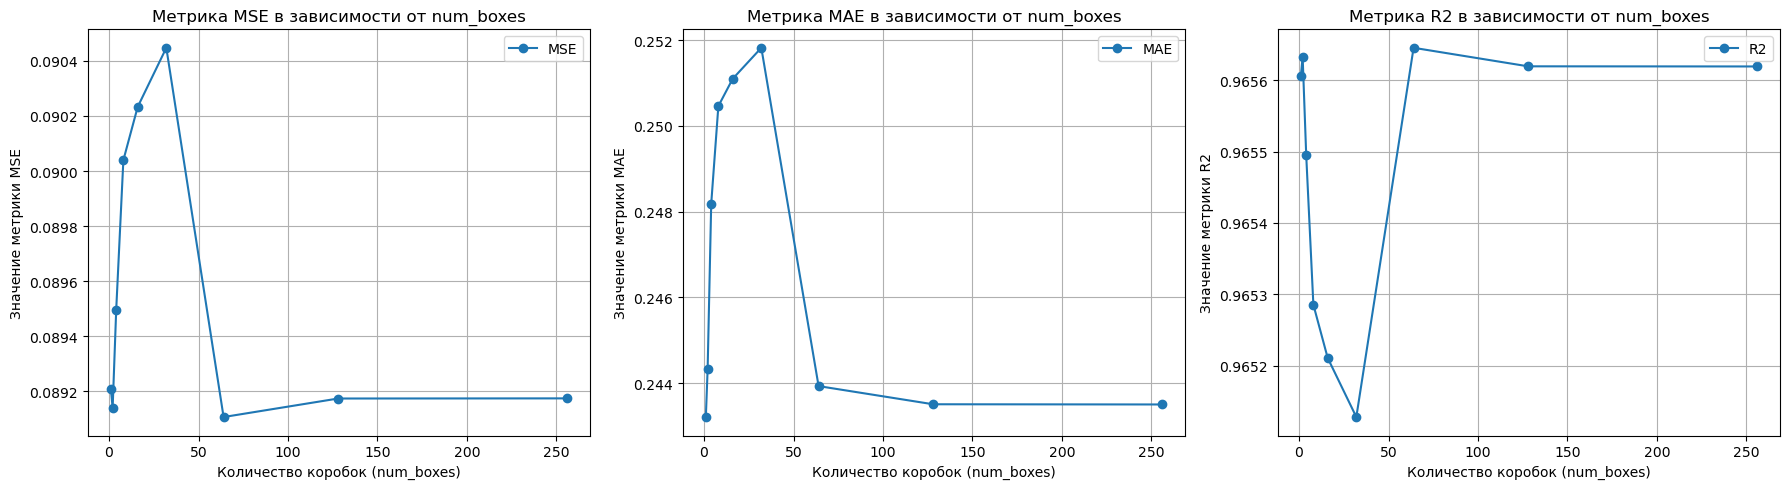

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd  # Для создания таблицы результатов
import itertools  # Для генерации комбинаций углов бокса

class LeastSquaresFitter:
    def __init__(self, func, learning_rate=0.01, max_iterations=1000):
        """
        Инициализация класса.

        Parameters:
        func: callable
            Функция g, принимающая параметры a и массив x.
        learning_rate: float
            Скорость обучения для градиентного спуска.
        max_iterations: int
            Максимальное количество итераций для градиентного спуска.
        """
        self.func = func
        self.coefficients = None
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations

    def create_boxes(self, bounds, num_boxes):
        """
        Функция для создания коробок в n-мерном пространстве.

        Parameters:
        bounds: list of tuples
            Пределы по каждой оси [(xmin, xmax), (ymin, ymax), ...].
        num_boxes: int
            Количество коробок по каждой оси.

        Returns:
        boxes: list
            Список коробок.
        """
        dimensions = len(bounds)
        edges = []
        for dim in range(dimensions):
            min_val, max_val = bounds[dim]
            edges.append(np.linspace(min_val, max_val, num_boxes + 1))

        # Создаем сетку индексов для всех комбинаций коробок
        indices = np.indices([num_boxes]*dimensions).reshape(dimensions, -1).T

        boxes = []
        for index in indices:
            box = []
            for dim, idx in enumerate(index):
                box.append((edges[dim][idx], edges[dim][idx+1]))
            boxes.append(box)
        return boxes

    def generate_points(self, f, bounds, num_boxes, m_total, a_true, method='adaptive'):
        """
        Генерация точек для функции f(x) с выбранным методом.

        Parameters:
        f: callable
            Функция для генерации значений y.
        bounds: list of tuples
            Пределы по каждой оси [(xmin, xmax), (ymin, ymax), ...].
        num_boxes: int
            Количество коробок по каждой оси (только для адаптивного метода).
        m_total: int
            Общее количество точек.
        a_true: np.array
            Истинные коэффициенты.
        method: str
            Метод генерации точек ('random' или 'adaptive').

        Returns:
        points: np.array
            Сгенерированные факторы (входные данные x).
        values: np.array
            Значения функции на этих точках (целевые значения y).
        """
        if method == 'adaptive':
            # Используем адаптивный алгоритм
            boxes = self.create_boxes(bounds, num_boxes)
            num_boxes_total = len(boxes)
            changes = []

            # Оценка изменений функции в каждой коробке
            for box in boxes:
                # Получаем min и max по каждой оси для текущего бокса
                mins = []
                maxs = []
                for (min_val, max_val) in box:
                    mins.append(min_val)
                    maxs.append(max_val)
                # Генерируем все комбинации мин и макс для получения углов бокса
                corners = list(itertools.product(*zip(mins, maxs)))
                corners = np.array(corners)
                # Вычисляем значения функции в углах бокса
                values_at_corners = f(corners, a_true)
                # Оцениваем изменение функции в боксе
                change = np.max(values_at_corners) - np.min(values_at_corners)
                # Добавляем изменение в список изменений
                changes.append(change)

            # Нормализация изменений
            total_change = np.sum(changes)
            if total_change == 0:
                # Если все изменения равны нулю, распределяем точки равномерно
                normalized_changes = [1 / num_boxes_total] * num_boxes_total
            else:
                normalized_changes = [change / total_change for change in changes]

            # Генерация точек пропорционально изменениям
            all_points = []
            all_values = []

            for i, box in enumerate(boxes):
                num_points_in_box = max(1, int(m_total * normalized_changes[i]))  # Гарантируем хотя бы 1 точку
                # Генерируем точки внутри бокса
                points_in_box = []
                for (min_val, max_val) in box:
                    points_in_box.append(np.random.uniform(min_val, max_val, num_points_in_box))
                points_in_box = np.column_stack(points_in_box)
                values = f(points_in_box, a_true)
                all_points.append(points_in_box)
                all_values.append(values)

            return np.vstack(all_points), np.concatenate(all_values)

        elif method == 'random':
            # Полностью случайная генерация точек
            dimensions = len(bounds)
            points = []
            for (min_val, max_val) in bounds:
                points.append(np.random.uniform(min_val, max_val, m_total))
            points = np.column_stack(points)
            values = f(points, a_true)
            return points, values

        else:
            raise ValueError(f"Неизвестный метод генерации точек: {method}")

    def loss_function(self, a, x, y):
        """
        Функция потерь (метод наименьших квадратов).

        Parameters:
        a: np.array
            Текущие коэффициенты.
        x: np.array
            Входные данные.
        y: np.array
            Целевые значения.

        Returns:
        float
            Значение функции потерь.
        """
        predictions = self.func(a, x)
        return np.sum((predictions - y) ** 2)

    def gradient(self, a, x, y):
        """
        Вычисление градиента функции потерь по коэффициентам a.

        Parameters:
        a: np.array
            Текущие коэффициенты.
        x: np.array
            Входные данные.
        y: np.array
            Целевые значения.

        Returns:
        np.array
            Градиент функции потерь по a.
        """
        predictions = self.func(a, x)
        errors = predictions - y
        grad = 2 * np.dot(errors, x) / len(y)
        return grad

    def fit(self, x, y):
        """
        Подбор коэффициентов методом градиентного спуска.

        Parameters:
        x: np.array
            Входные данные.
        y: np.array
            Целевые значения.
        """
        a = np.zeros(x.shape[1])
        for iteration in range(self.max_iterations):
            grad = self.gradient(a, x, y)
            a -= self.learning_rate * grad

            # Дополнительно можно добавить условие остановки по малости градиента
            if np.linalg.norm(grad) < 1e-6:
                print(f"Градиентный спуск сошелся за {iteration} итераций.")
                break

        self.coefficients = a
        return self.coefficients

    def evaluate(self, x, y, criterion='MSE'):
        """
        Оценка точности модели по заданному критерию.

        Parameters:
        x: np.array
            Входные данные.
        y: np.array
            Целевые значения.
        criterion: str
            Критерий оценки ('MSE', 'MAE', 'R2').

        Returns:
        float
            Значение выбранной метрики.
        """
        if self.coefficients is None:
            raise ValueError("Модель не обучена. Сначала вызовите метод fit.")

        predictions = self.func(self.coefficients, x)

        if criterion == 'MSE':
            metric_value = mean_squared_error(y, predictions)
        elif criterion == 'MAE':
            metric_value = mean_absolute_error(y, predictions)
        elif criterion == 'R2':
            metric_value = r2_score(y, predictions)
        else:
            raise ValueError(f"Неизвестный критерий оценки: {criterion}")

        return metric_value

    def predict(self, x):
        """
        Предсказание значений y по входным данным x.

        Parameters:
        x: np.array
            Входные данные.

        Returns:
        np.array
            Предсказанные значения y.
        """
        if self.coefficients is None:
            raise ValueError("Модель не обучена. Сначала вызовите метод fit.")

        return self.func(self.coefficients, x)

# Пример использования
if __name__ == "__main__":
    # Импортируем библиотеку pandas для создания таблицы
    import pandas as pd

    # Определяем функцию g, которую будем подбирать
    def g(a, x):
        return np.dot(x, a) + np.sum(x ** 2, axis=1) **2

    # Определяем функцию f, описывающую резкое возрастание и провал
    def f(x, a_true):
        """
        Функция вычисляет значение на основе входных данных и параметров.
        
        Параметры:
        x : numpy.ndarray
            Входные данные (матрица).
        a_true : numpy.ndarray
            Вектор параметров.
    
        Возвращает:
        numpy.ndarray
            Результат вычисления.
        """
        return (np.dot(x, a_true) +
                np.sum(x ** 2, axis=1) +
                np.sum(x ** 3, axis=1) +
                np.sum(x ** 4, axis=1))

    # Задаем истинные коэффициенты
    true_coefficients = np.array([2.5, -1.2])

    # Создаем экземпляр класса с параметрами градиентного спуска
    fitter = LeastSquaresFitter(func=g, learning_rate=0.01, max_iterations=10000)

    # Задаем параметры
    bounds = [(0, 1), (0, 1)]  # Ограничения для каждой переменной
    m_total_train = 5000  # Общее количество обучающих точек
    m_total_test = 1000   # Общее количество тестовых точек

    # Генерируем тестовый набор данных (используем случайный метод)
    x_test, y_test = fitter.generate_points(
        f, bounds, num_boxes=None, m_total=m_total_test, a_true=true_coefficients, method='random'
    )

    # Список значений num_boxes для экспериментов
    num_boxes_list = [1, 2, 4, 8, 16, 32, 64, 128, 256]

    # Список для хранения результатов
    results = []

    for num_boxes in num_boxes_list:
        # Генерируем обучающий набор данных с текущим num_boxes
        x_train, y_train = fitter.generate_points(
            f, bounds, num_boxes, m_total_train, a_true=true_coefficients, method='adaptive'
        )

        # Обучаем модель
        fitter.fit(x_train, y_train)

        # Оцениваем модель на тестовом наборе данных для всех метрик
        metrics = {}
        for criterion in ['MSE', 'MAE', 'R2']:
            metric_value = fitter.evaluate(x_test, y_test, criterion=criterion)
            metrics[criterion] = metric_value

        # Сохраняем результаты
        results.append({
            'num_boxes': num_boxes,
            'MSE': metrics['MSE'],
            'MAE': metrics['MAE'],
            'R2': metrics['R2']
        })

    # Создаем таблицу результатов
    results_df = pd.DataFrame(results)

    # Выводим таблицу
    print("Результаты экспериментов при различном количестве коробок (num_boxes):")
    print(results_df)

    # Визуализация метрик в зависимости от num_boxes на одном графике с помощью subplots
    metrics = ['MSE', 'MAE', 'R2']
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    for idx, metric in enumerate(metrics):
        axs[idx].plot(results_df['num_boxes'], results_df[metric], marker='o', label=metric)
        axs[idx].set_xlabel('Количество коробок (num_boxes)')
        axs[idx].set_ylabel(f'Значение метрики {metric}')
        axs[idx].set_title(f'Метрика {metric} в зависимости от num_boxes')
        axs[idx].grid(True)
        axs[idx].legend()

    plt.tight_layout()
    plt.show()

### план работ
- взять набор данных boston house price
- построить базовую модель
- сгенерировать данные умной стратегией - задать ограничения по столбцам и коробкам
- построить новую модель
- сравнить точности
- сделать массив вычислений по количеству коробок

In [7]:
np.random.uniform(0, 1, 10)

array([0.92358529, 0.96604424, 0.8513827 , 0.14741835, 0.69667037,
       0.08706761, 0.55740108, 0.39203326, 0.07315344, 0.00553883])